## Comparison Charts

### 1. Single variable Exploration

#### Histogram

 - Bell Shaped
 - Double Peaked
 - Skewed
 - Truncated
 - Ragged Plateau

#### Box Plot

 - Outliers
 - Median
 - Quartiles
 - Density functions

http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html

In [1]:
library(ggplot2)

In [2]:
data(airquality)

In [3]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


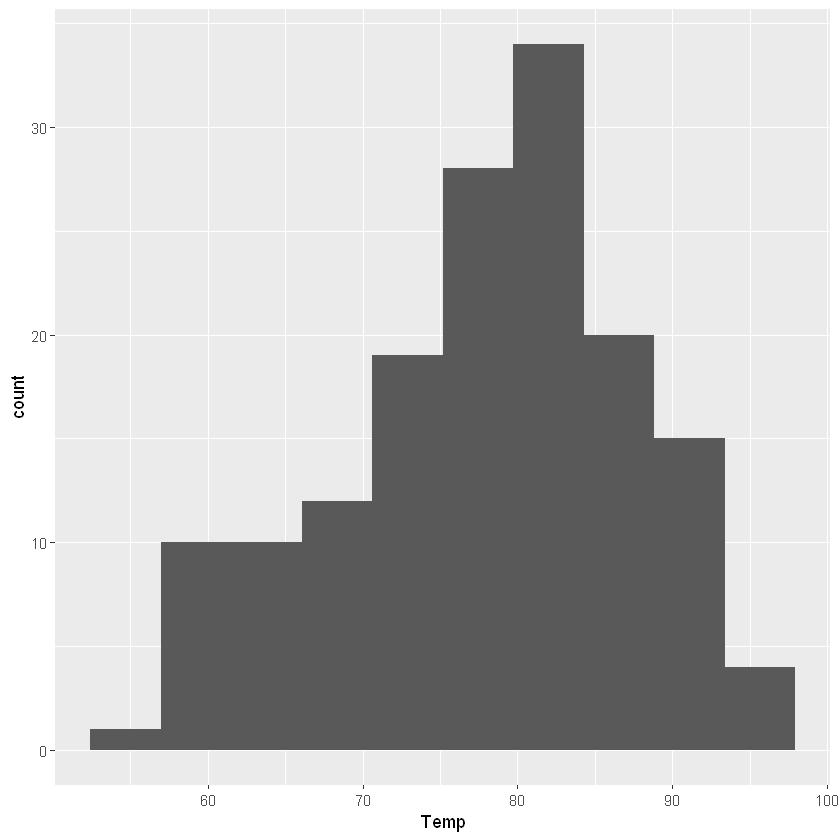

In [4]:
# basic histogram
p <- ggplot(airquality, aes(x=Temp)) + 
  geom_histogram(bins=10)
p

Warning message:
"Removed 37 rows containing non-finite values (`stat_bin()`)."


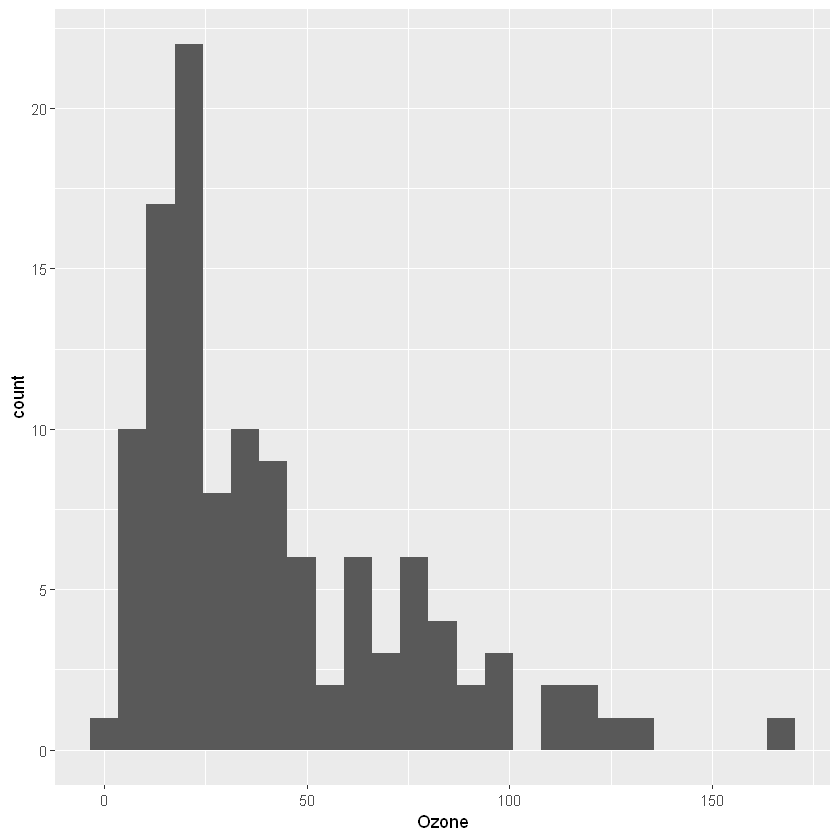

In [5]:
ggplot(airquality, aes(x=Ozone, na.rm = TRUE)) + 
  geom_histogram(bins=25)

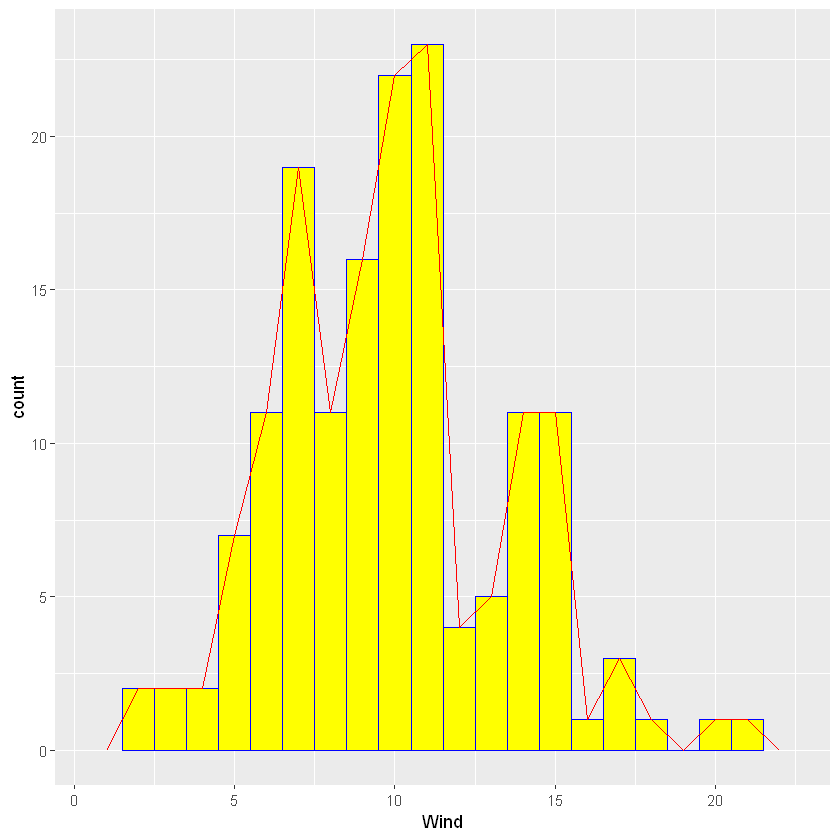

In [6]:
p <- ggplot(airquality, aes(x=Wind)) + 
  geom_histogram(bins=20,fill="Yellow", color="Blue") +
  geom_freqpoly(binwidth=1,color="Red")
p

Warning message:
"Removed 7 rows containing non-finite values (`stat_bin()`)."


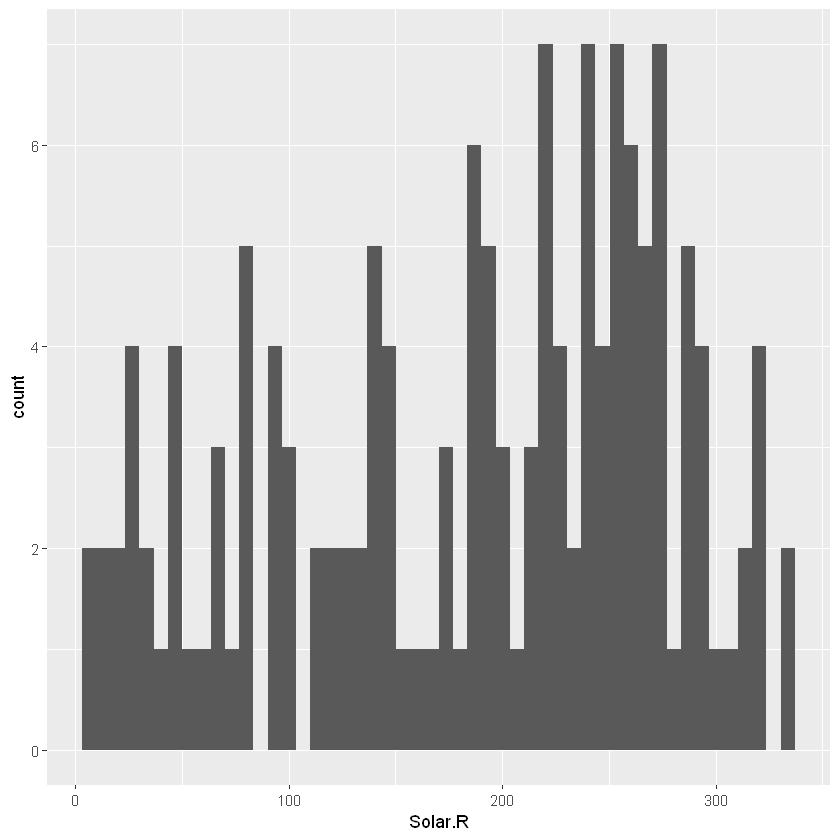

In [7]:
ggplot(airquality, aes(x=Solar.R)) + 
  geom_histogram(bins=50)

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


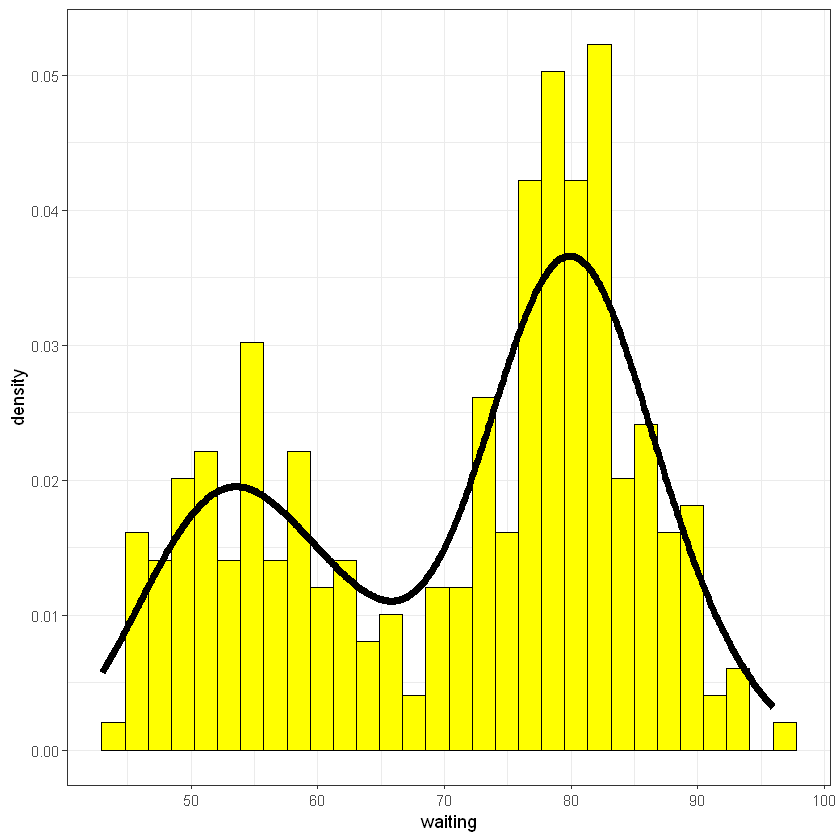

In [8]:
ggplot(faithful, aes(x = waiting)) +
    geom_histogram(bins=30, fill = "yellow", color = "black", aes(y =..density..)) +
geom_density(col="black", linewidth=2) + theme_bw() +
theme(
legend.position='none')


https://ggplot2.tidyverse.org/reference/geom_histogram.html

#### Box Plot

 - Outliers
 - Median
 - Quartiles
 - Density functions

#### Box Plot
Box plot is an excellent tool to study distribution. It can also show the distributions within multiple groups, along with the median, range and outliers if any.

The dark line inside the box represents the median. The top of box is 75%ile and bottom of box is 25%ile. The end points of the lines (aka whiskers) is at a distance of 1.5*IQR, where IQR or Inter Quartile Range is the distance between 25th and 75th percentiles. The points outside the whiskers are marked as dots and are normally considered as extreme points.

Setting varwidth=T adjusts the width of the boxes to be proportional to the number of observation it contains.

In [9]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


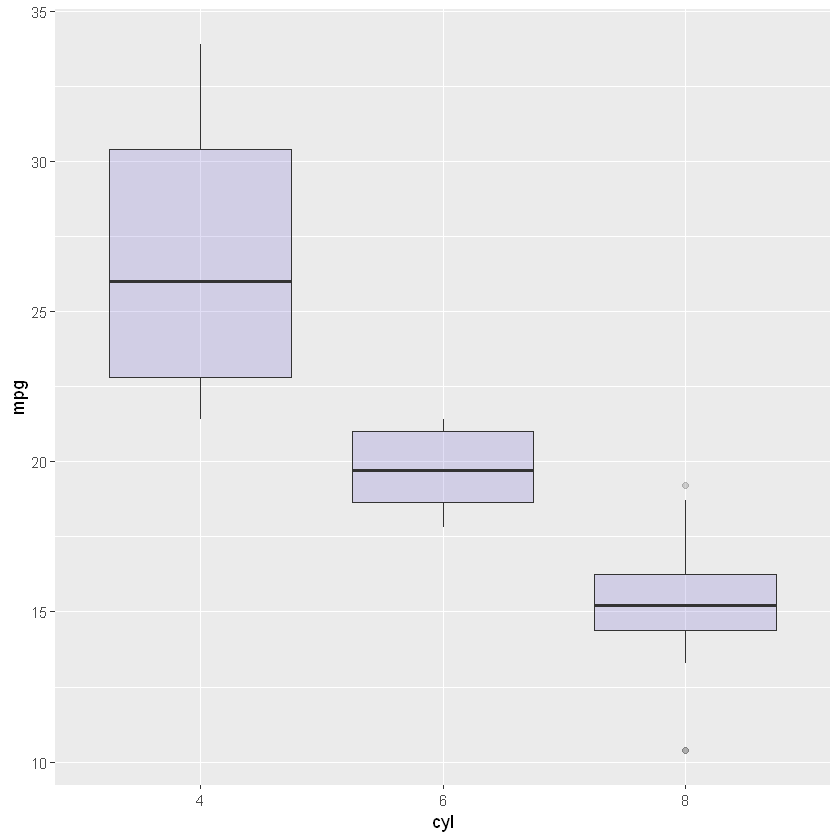

In [10]:
ggplot(mtcars, aes(x=as.factor(cyl), y=mpg)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("cyl")

## Statistics demo:
 - List the numbers in numeric order (i.e. sorted)
 - Find the number in the middle position (median)
 - Find the number in the middle of the part below the median (Q1)
 - Find the number in the middle of the part above the median (Q3)
 - Find the interquartile range (IQR) which is Q3 - Q1
 - Minimum is number just higher than Q1 minus IQR * 1.5
 - Maximum is number just lower than Q3 plus IQR * 1.5
 
 ### There are outliers in the mpg statistics for 8-cylinder cars.  What are they?

In [ ]:
lst <- sort(mtcars[mtcars$cyl==8,]$mpg)

median(lst)
quantile (lst)
qs <-quantile (lst)
IQR (lst)
qs[2] # Q3
qs[4] # Q1

In [ ]:
IQR <- qs[4] - qs[2]
IQR * 1.5

min = 14.3 - 2.775
min

max = 15.8 + 2.775
max

#### So we have outliers...

10.4 < minimum (11.525)

19.2 > maximum (18.575)

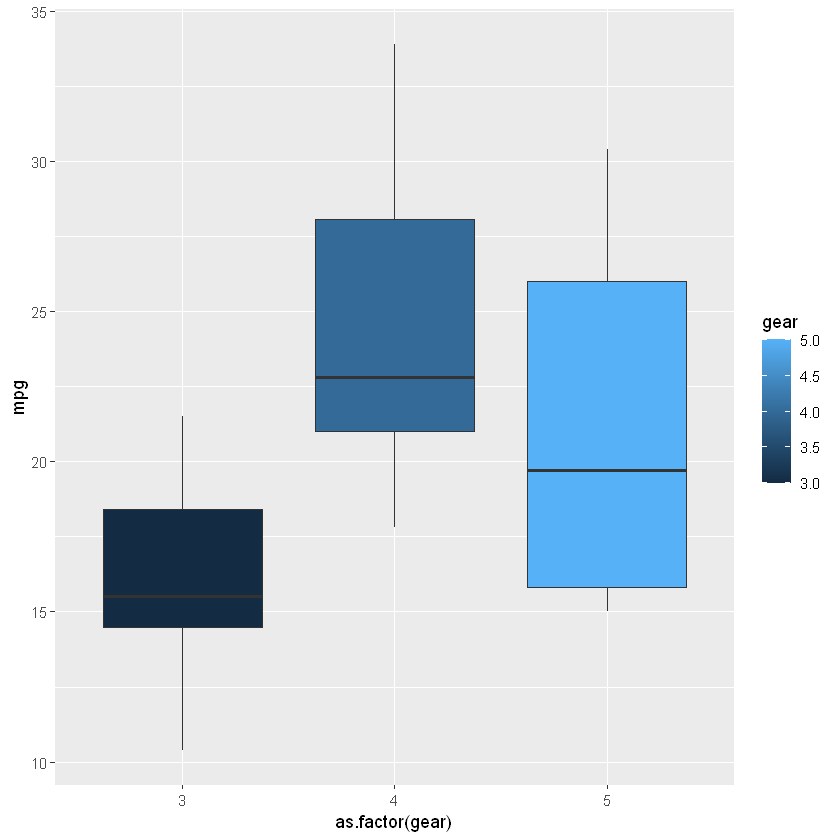

In [11]:
ggplot(mtcars, aes(x=as.factor(gear), y=mpg, fill=gear)) + geom_boxplot()

In [12]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


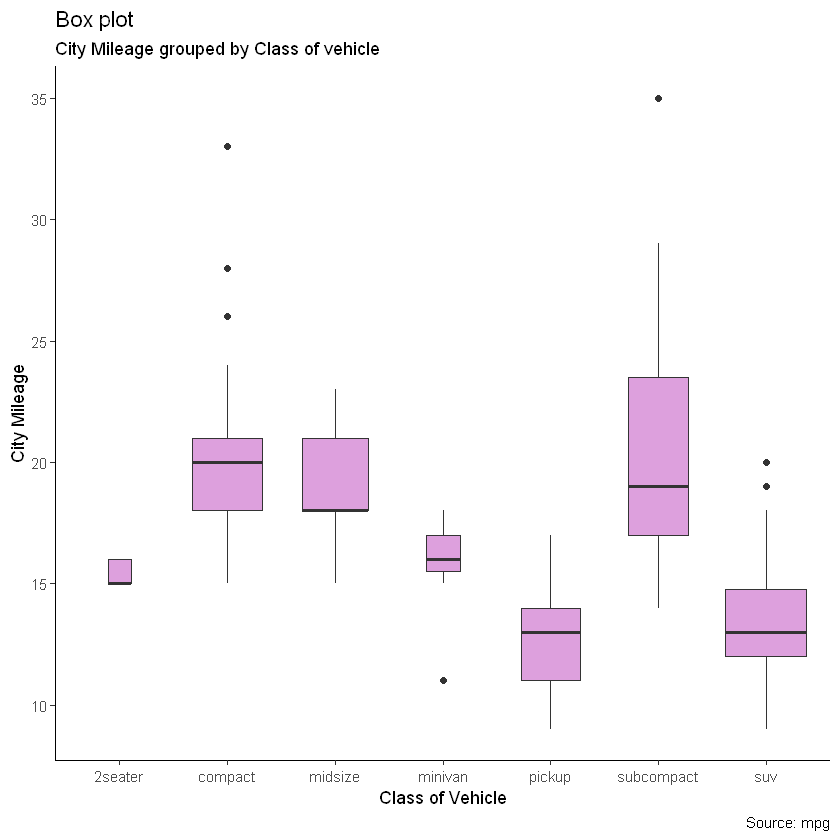

In [13]:
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(class, cty))
g + geom_boxplot(varwidth=T, fill="plum") + 
    labs(title="Box plot", 
         subtitle="City Mileage grouped by Class of vehicle",
         caption="Source: mpg",
         x="Class of Vehicle",
         y="City Mileage")

#### Density plot

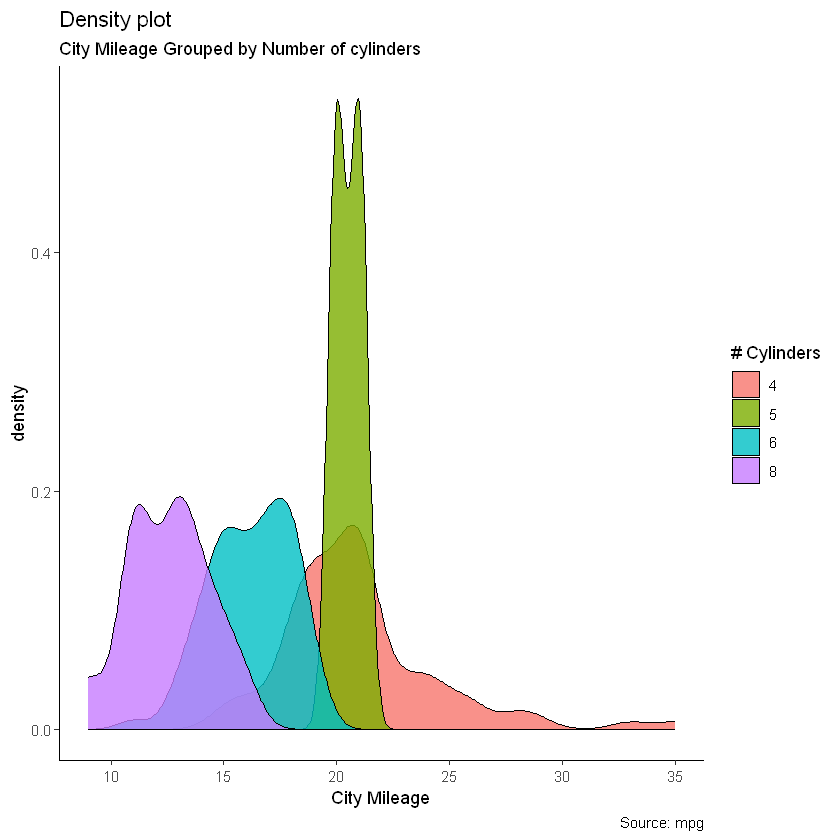

In [14]:

theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(cty))
g + geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    labs(title="Density plot", 
         subtitle="City Mileage Grouped by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")

## Comparison Charts

 ### 2. Simple Comparisons

#### Bar charts
 - comparing values 

##### Parts of a Whole

 - Pie Charts (not shown here)
 - Rose Charts (not shown here)
 - Doughnut Charts (not shown here)
 - Radar Charts
 - Tree map

THis package implements 'Functions from medical statistics book'
https://rdrr.io/cran/fmsb/

,math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20,20,20,20,20,20,20,20,20,20
2,0,0,0,0,0,0,0,0,0,0
3,4,10,6,17,6,4,7,19,12,14


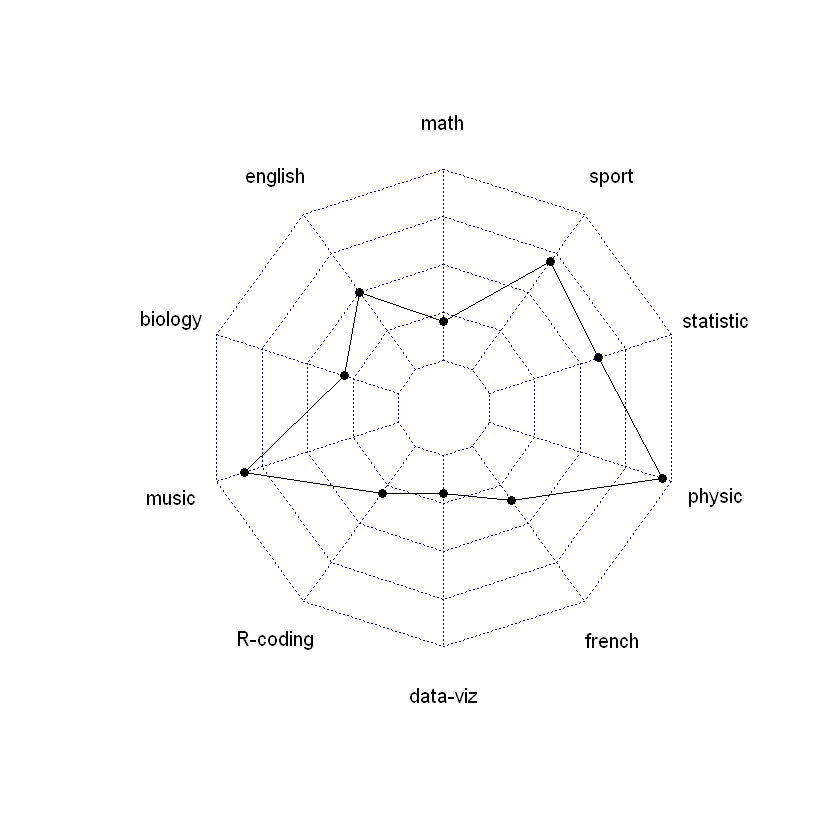

In [15]:
# Library
#install.packages("fmsb")
library(fmsb)
 
# Create data: set up max and min results in each subjectl
data <- as.data.frame(matrix( sample( 2:20 , 10 , replace=T) , ncol=10))
colnames(data) <- c(
    "math" , "english" , "biology" ,
    "music" , "R-coding", "data-viz" ,
    "french" , "physic", "statistic", "sport" )
 
# To use the fmsb package, I have to add 2 lines to the dataframe: 
# the max and min of each topic to show on the plot!
data <- rbind(rep(20,10) , rep(0,10) , data)
 
# Check your data, it has to look like this!
head(data)

# The default radar chart 
radarchart(data)

 #### Treemap

Treemaps display hierarchical data as a set of nested rectangles. Each branch of the tree is given a rectangle, which is then tiled with smaller rectangles representing sub-branches. A leaf node's rectangle has an area proportional to a specified dimension of the data. The leaf nodes can be coloured to show a separate dimension of the data.

When the color and size dimensions are correlated in some way with the tree structure, one can often easily see patterns that would be difficult to spot in other ways, such as whether a certain color is particularly relevant. A second advantage of treemaps is that, by construction, they make efficient use of space. As a result, they can legibly display thousands of items on the screen simultaneously. (source:Wikipedia)

In [16]:
# library
#install.packages("treemap")
library(treemap)
 
# Create data
group <- c("group-1","group-2","group-3")
value <- c(13,5,22)
data <- data.frame(group,value)

In [17]:
data

group,value
<chr>,<dbl>
group-1,13
group-2,5
group-3,22


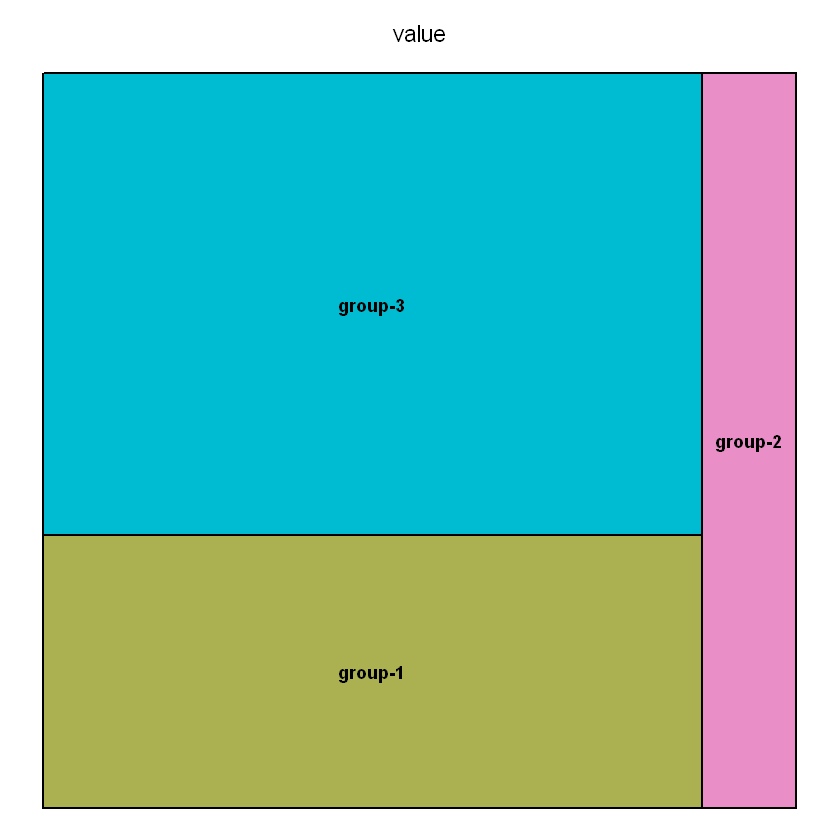

In [18]:
 
# treemap
treemap(data,
            index="group",
            vSize="value",
            type="index"
            )

In [19]:

# Build hierarchical Dataset
group <- c(rep("group-1",4),rep("group-2",2),rep("group-3",3))
subgroup <- paste("subgroup" , c(1,2,3,4,1,2,1,2,3), sep="-")
value <- c(13,5,22,12,11,7,3,1,23)
data <- data.frame(group,subgroup,value)
 

In [20]:
data

group,subgroup,value
<chr>,<chr>,<dbl>
group-1,subgroup-1,13
group-1,subgroup-2,5
group-1,subgroup-3,22
group-1,subgroup-4,12
group-2,subgroup-1,11
group-2,subgroup-2,7
group-3,subgroup-1,3
group-3,subgroup-2,1
group-3,subgroup-3,23


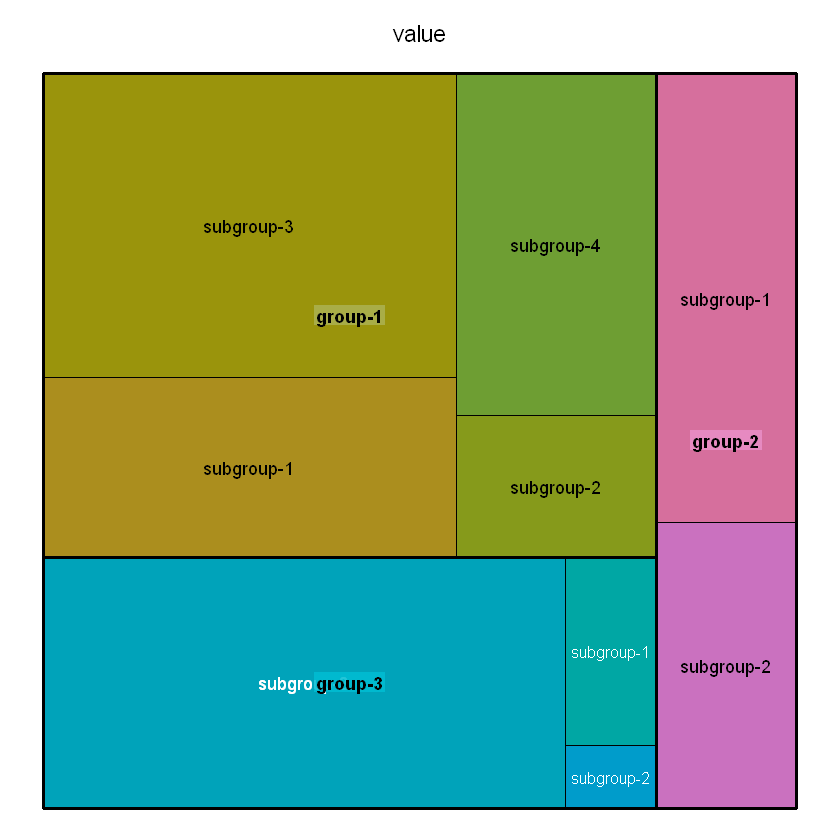

In [21]:
# treemap
treemap(data,
            index=c("group","subgroup"),
            vSize="value",
            type="index"
            ) 

Now let's try it on some real data.  Remember gapminder?

In [22]:
library(gapminder)
str(gapminder)

tibble [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


We can do treemaps of population spread worldwide in  different years.

In [23]:
library(sqldf)
gm1952=sqldf("select continent, country,
pop/10000 pop from gapminder where year = 1952")
gm2007=sqldf("select continent, country,
pop/10000 pop from gapminder where year = 2007")

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



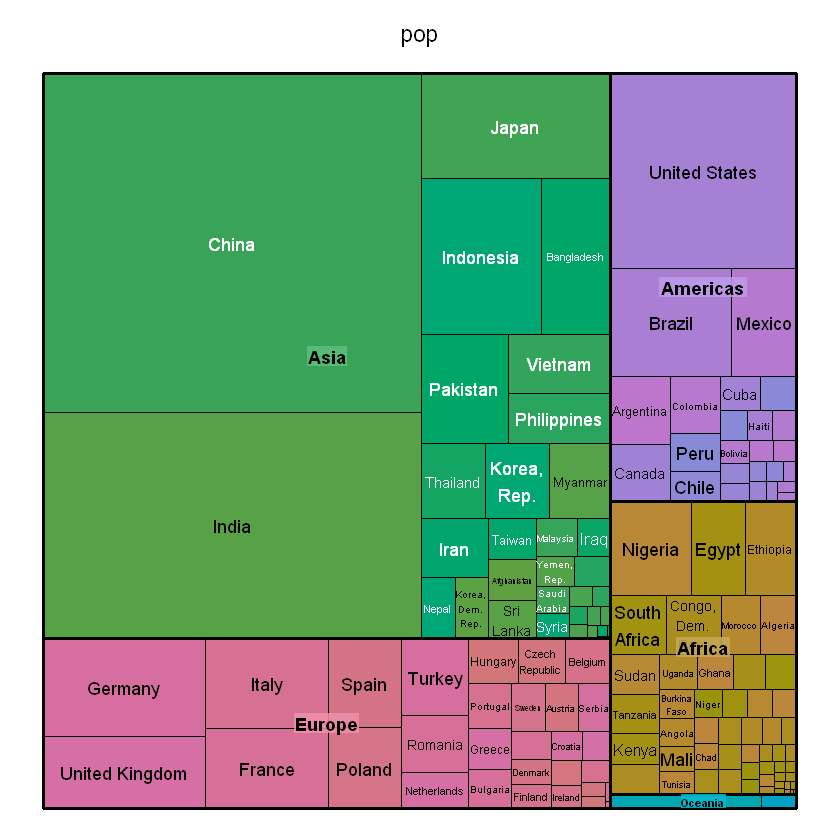

In [24]:
treemap(gm1952,
            index=c("continent","country"),
            vSize="pop",
            type="index"
            ) 

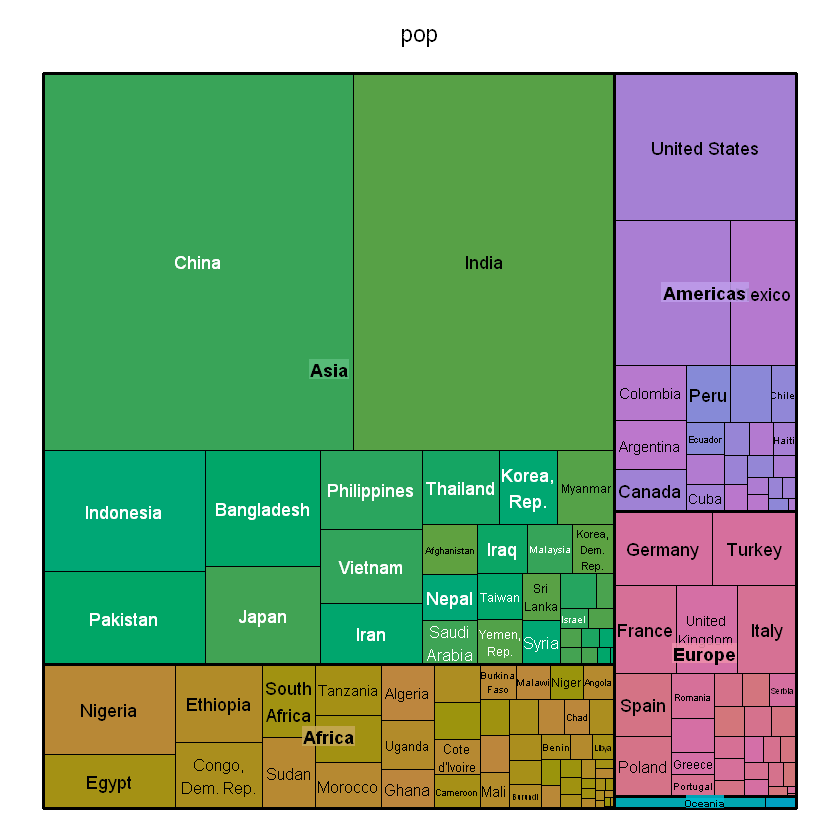

In [25]:
treemap(gm2007,
            index=c("continent","country"),
            vSize="pop",
            type="index"
            ) 

## Comparison Charts

### Multi distribution comparisons

 - Overlaid Histograms
 - Back-to-back histograms
 - Small multiples


To draw multiple histograms within a ggplot2 plot, we have to specify the fill to be equal to the grouping variable of our data (i.e. fill = group).

We also have to specify the alpha argument within the geom_histogram function to be smaller than 1. The alpha argument specifies the transparency of our histograms and therefore allows to display multiple histograms overlaying each other.

In [26]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


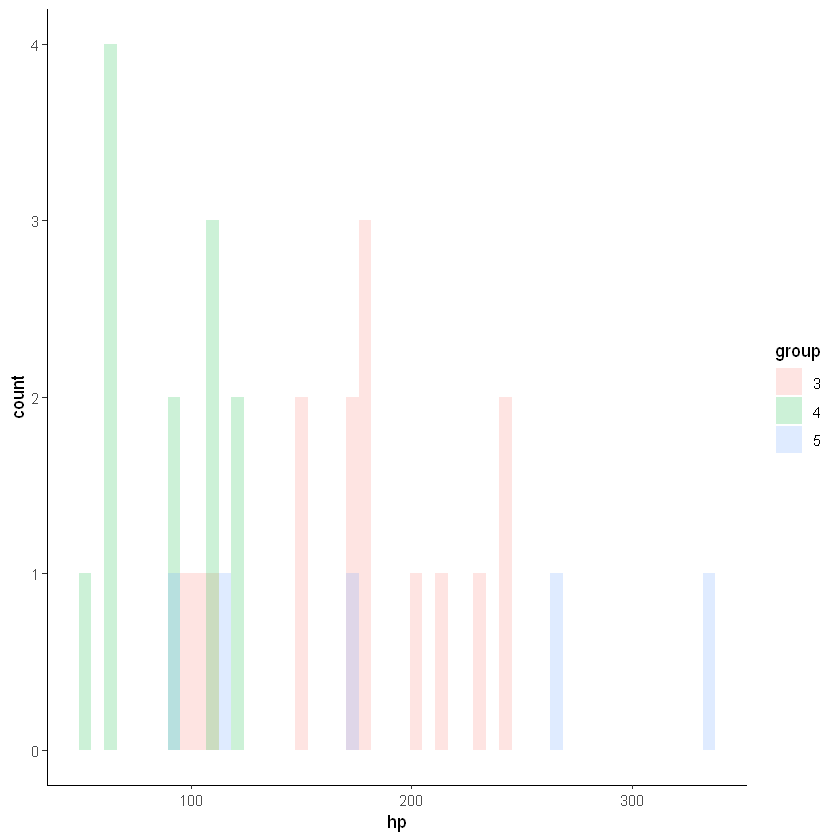

In [27]:
mtcars$group = as.factor(mtcars$gear)
ggplot(mtcars, aes(x = hp, fill = group)) +   
# Draw overlaying histogram
  geom_histogram(position = "identity", alpha = 0.2, bins = 50)

Let's look at a different dataset

In [28]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


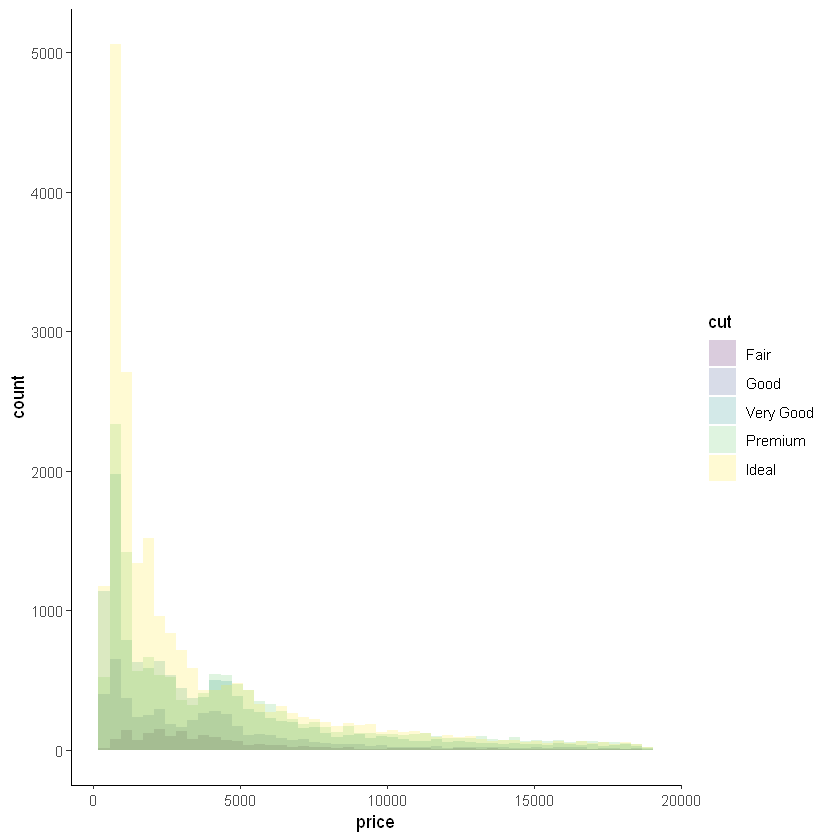

In [29]:
ggplot(diamonds, aes(x = price, fill = cut)) +   
# Draw overlaying histogram
  geom_histogram(position = "identity", alpha = 0.2, bins = 50)

#### Diverging bars
Diverging Bars is a bar chart that can handle both negative and positive values. This can be implemented by a smart tweak with geom_bar().  geom_bar() can  be used to make  a histogram as well as a bar chart.

By default, geom_bar() has the stat set to count. That means, when you provide just a continuous X variable (and no Y variable), it tries to make a histogram out of the data.

In order to make a bar chart create bars instead of histogram, you need to do two things.

 - Set stat=identity
 - Provide both x and y inside aes() where, x is either character or factor and y is numeric.
 
In order to make sure you get diverging bars instead of just bars, make sure, your categorical variable has 2 categories that changes values at a certain threshold of the continuous variable. In below example, the mpg from mtcars dataset is normalised by computing the z score. Those vehicles with mpg above zero are marked green and those below are marked red.  An explanation of z-scores can be found at https://www.statisticshowto.com/probability-and-statistics/z-score/

In [30]:
theme_set(theme_bw())  

 # create new column for car names
mtcars$carname <- rownames(mtcars) 
# compute normalized mpg
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)

# above / below avg flag
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "below", "above") 
# sort
mtcars <- mtcars[order(mtcars$mpg_z), ] 
# convert to factor to retain sorted order in plot.
mtcars$carname <- factor(mtcars$carname, levels = mtcars$carname)  

str(mtcars)

'data.frame':	32 obs. of  15 variables:
 $ mpg     : num  10.4 10.4 13.3 14.3 14.7 15 15.2 15.2 15.5 15.8 ...
 $ cyl     : num  8 8 8 8 8 8 8 8 8 8 ...
 $ disp    : num  472 460 350 360 440 ...
 $ hp      : num  205 215 245 245 230 335 180 150 150 264 ...
 $ drat    : num  2.93 3 3.73 3.21 3.23 3.54 3.07 3.15 2.76 4.22 ...
 $ wt      : num  5.25 5.42 3.84 3.57 5.34 ...
 $ qsec    : num  18 17.8 15.4 15.8 17.4 ...
 $ vs      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ am      : num  0 0 0 0 0 1 0 0 0 1 ...
 $ gear    : num  3 3 3 3 3 5 3 3 3 5 ...
 $ carb    : num  4 4 4 4 4 8 3 2 2 4 ...
 $ group   : Factor w/ 3 levels "3","4","5": 1 1 1 1 1 3 1 1 1 3 ...
 $ carname : Factor w/ 32 levels "Cadillac Fleetwood",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ mpg_z   : num  -1.61 -1.61 -1.13 -0.96 -0.89 -0.84 -0.81 -0.81 -0.76 -0.71 ...
 $ mpg_type: chr  "below" "below" "below" "below" ...


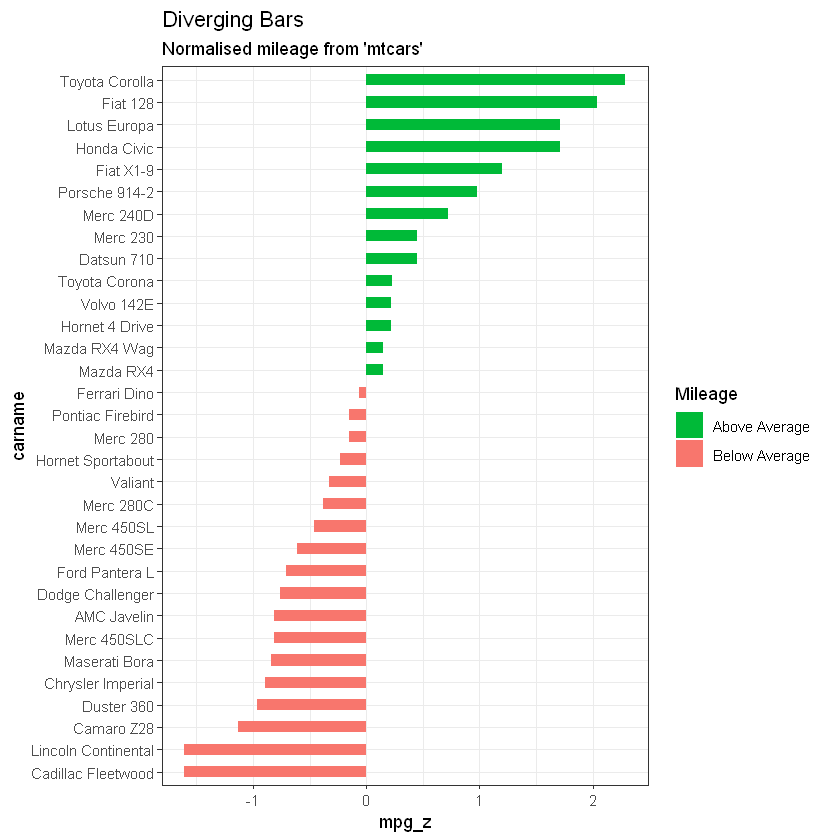

In [31]:
# Diverging Barcharts
ggplot(mtcars, aes(x=carname, y=mpg_z, label=mpg_z)) + 
  geom_bar(stat='identity', aes(fill=mpg_type), width=.5)  +
  scale_fill_manual(name="Mileage", 
                    labels = c("Above Average", "Below Average"), 
                    values = c("above"="#00ba38", "below"="#f8766d")) + 
  labs(subtitle="Normalised mileage from 'mtcars'", 
       title= "Diverging Bars") + 
  coord_flip()

## Aesthetics

ylim(c(0,6))+
 xlab("Miles Per Gallon") + ylab("Weight (Tons)")
 
  ### Change axis lines
  axis.line = element_line(),
  
  ### Change axis ticks text labels: font color, size and face
  
  axis.text = element_text(),       # Change tick labels for all axes
  
  axis.text.x = element_text(),     # Change x axis tick labels only
  
  axis.title.x = element_text(size=18),     # Change x axis title
  
  axis.text.x.top = element_text(), # x axis tick labels on top axis
  
  axis.text.y = element_text(size=14, colour="blue"),     # Change y axis tick labels only
  
  axis.text.y.right = element_text(),# y  axis tick labels on top axis

  
  ### Change axis ticks line: font color, size, linetype and length
  
  axis.ticks = element_line(),      # Change ticks line fo all axes
  
  axis.ticks.x = element_line(),    # Change x axis ticks only
  
  axis.ticks.y = element_line(),    # Change y axis ticks only
  
  axis.ticks.length = unit(3, "pt"), # Change the length of tick marks
  
  panel.border = element_blank(),
  
  panel.background = element_blank()
) 


### Small Multiples

In [32]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


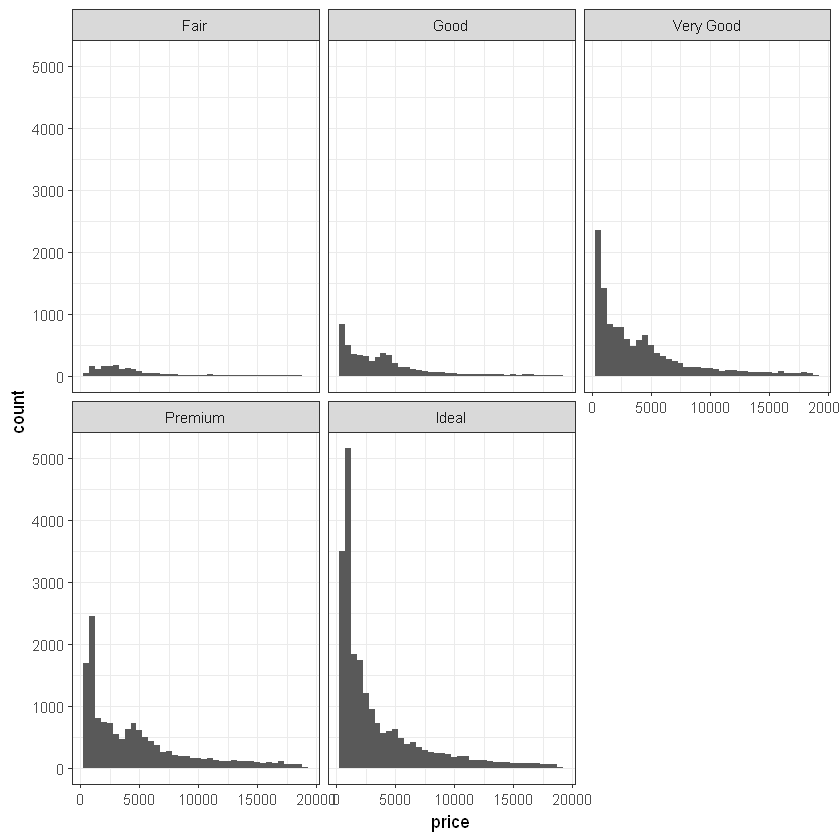

In [33]:

ggplot(data=diamonds, aes(x=price)) +
  geom_histogram(binwidth=500) +
  facet_wrap(~cut)
